In [22]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import geopandas as gp
import shapely
import fiona

shp_file_name = "NSW_LOCALITY_POLYGON_shp.shp"
zip_file_name = "nswlocalitypolygonshp.zip"
web_file_path = ("http://data.gov.au/dataset/91e70237-d9d1-4719-a82f-e71b811154c6/resource/" 
                 "bf8b5180-fcea-44bd-bd76-af14cc4b0fe0/download/nswlocalitypolygonshp.zip")

In [23]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
saved_style_state = matplotlib.rcParams.copy()

In [24]:
if os.path.isfile("type-of-incident-by-local-government-area.xlsx"):
    filepath = "type-of-incident-by-local-government-area.xlsx"
    print "loading from file"

incident_data = pd.read_excel(filepath)
print "done"

loading from file
done


In [25]:
incident_data.head()

,Local Government Area,"Fire, explosions",Non-fire rescue calls including animal rescues,Hazardous material incidents and other hazardous conditions,"Storm, floods and other natural disasters and calls for assistance from other agencies",Good intent calls,Other service calls,System initiated false alarms,Malicious false calls,Other calls,Total primary incidents
0,Albury,197,41,100,24,11,97,267,16,17,770
1,Armidale Dumaresq,218,26,41,12,4,83,228,15,6,633
2,Ashfield,84,61,112,30,23,155,193,4,27,689
3,Auburn,228,183,340,54,46,122,935,21,43,1972
4,Ballina,87,142,36,8,7,45,109,3,8,445


In [26]:
def unzip_zipfile(zipped_file_path, put_it_here="."):
    import zipfile
    zip_of_suburbs = zipfile.ZipFile(zipped_file_path, 'r')
    zip_of_suburbs.extractall(put_it_here)
    zip_of_suburbs.close()

In [27]:
# Get the data loaded. This is a bit complicated because it's online as a zip file.
# If we don't have it right now, we need to get it and unzip it.
if os.path.isfile(shp_file_name):
    print "loading from file"
else:
    if os.path.isfile(zip_file_name):
        print "unzipping"
        unzip_zipfile(zip_file_name)
    else:
        import requests
        print "loading from the internet"
        page = requests.get(web_file_path)
        with open(zip_file_name, 'wb') as z:
            z.write(page.content)
        unzip_zipfile(zip_file_name)

print "done"

loading from file
done


In [28]:
incident_data['Local Government Area'] = incident_data['Local Government Area'].str.upper()
incident_data

,Local Government Area,"Fire, explosions",Non-fire rescue calls including animal rescues,Hazardous material incidents and other hazardous conditions,"Storm, floods and other natural disasters and calls for assistance from other agencies",Good intent calls,Other service calls,System initiated false alarms,Malicious false calls,Other calls,Total primary incidents
0,ALBURY,197,41,100,24,11,97,267,16,17,770
1,ARMIDALE DUMARESQ,218,26,41,12,4,83,228,15,6,633
2,ASHFIELD,84,61,112,30,23,155,193,4,27,689
3,AUBURN,228,183,340,54,46,122,935,21,43,1972
4,BALLINA,87,142,36,8,7,45,109,3,8,445
5,BALRANALD,6,2,2,1,0,0,3,1,0,15
6,BANKSTOWN,555,463,730,135,98,304,814,33,53,3185
7,BATHURST REGIONAL,137,38,102,11,18,84,233,24,17,664
8,BEGA VALLEY,47,17,25,18,6,35,84,3,43,278
9,BELLINGEN,28,15,15,4,1,16,29,1,10,119


,Local Government Area,"Fire, explosions"
11,BLACKTOWN,1313
147,WOLLONGONG,1012
26,CAMPBELLTOWN,876
106,PENRITH,831
77,LAKE MACQUARIE,768
121,SYDNEY,716
83,LIVERPOOL,634
99,NEWCASTLE,602
6,BANKSTOWN,555
30,CESSNOCK,510


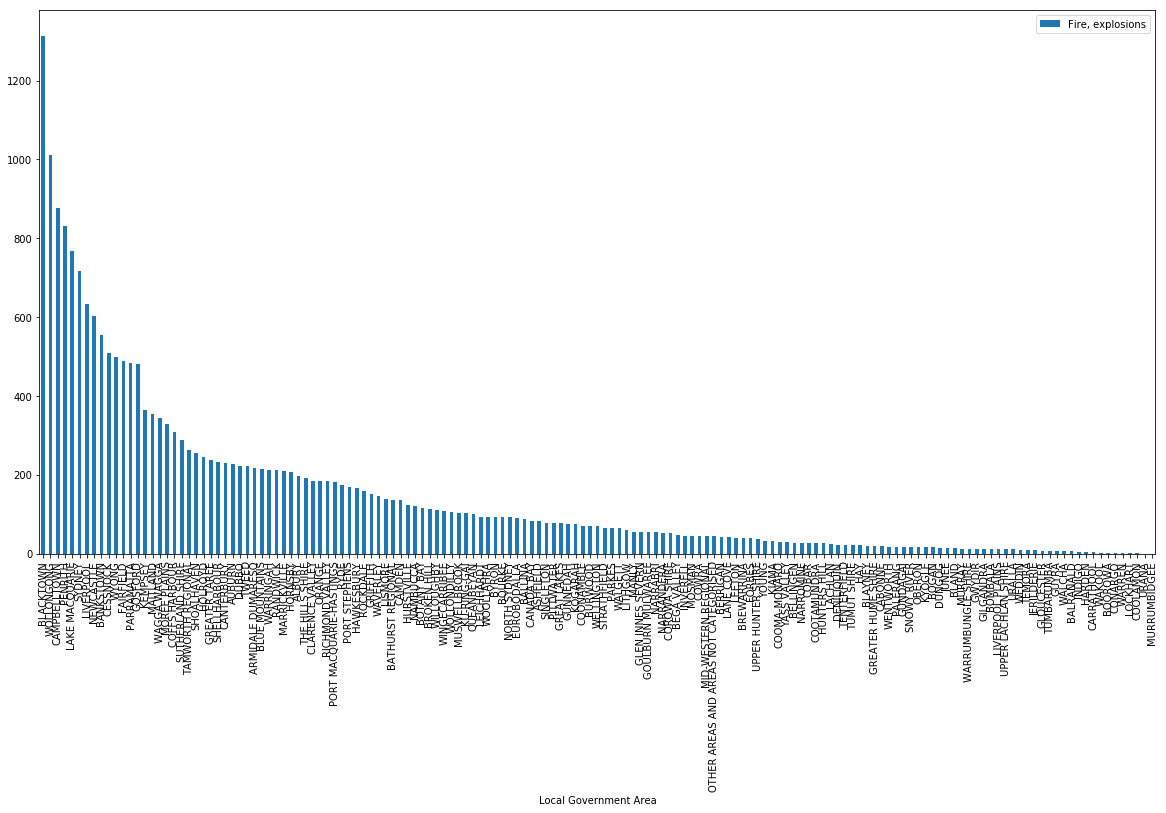

In [29]:
explosion = incident_data.iloc[:, [0, 1]]
explosion_sorted = explosion.sort_values(by=['Fire, explosions'], ascending=0)
explosion_sorted.plot(x = 'Local Government Area', y = 'Fire, explosions', kind = 'bar')
explosion_sorted.head(10)

,Local Government Area,Malicious false calls
121,SYDNEY,91
11,BLACKTOWN,88
106,PENRITH,57
26,CAMPBELLTOWN,54
77,LAKE MACQUARIE,52
99,NEWCASTLE,51
83,LIVERPOOL,49
105,PARRAMATTA,46
147,WOLLONGONG,37
50,GOSFORD,37


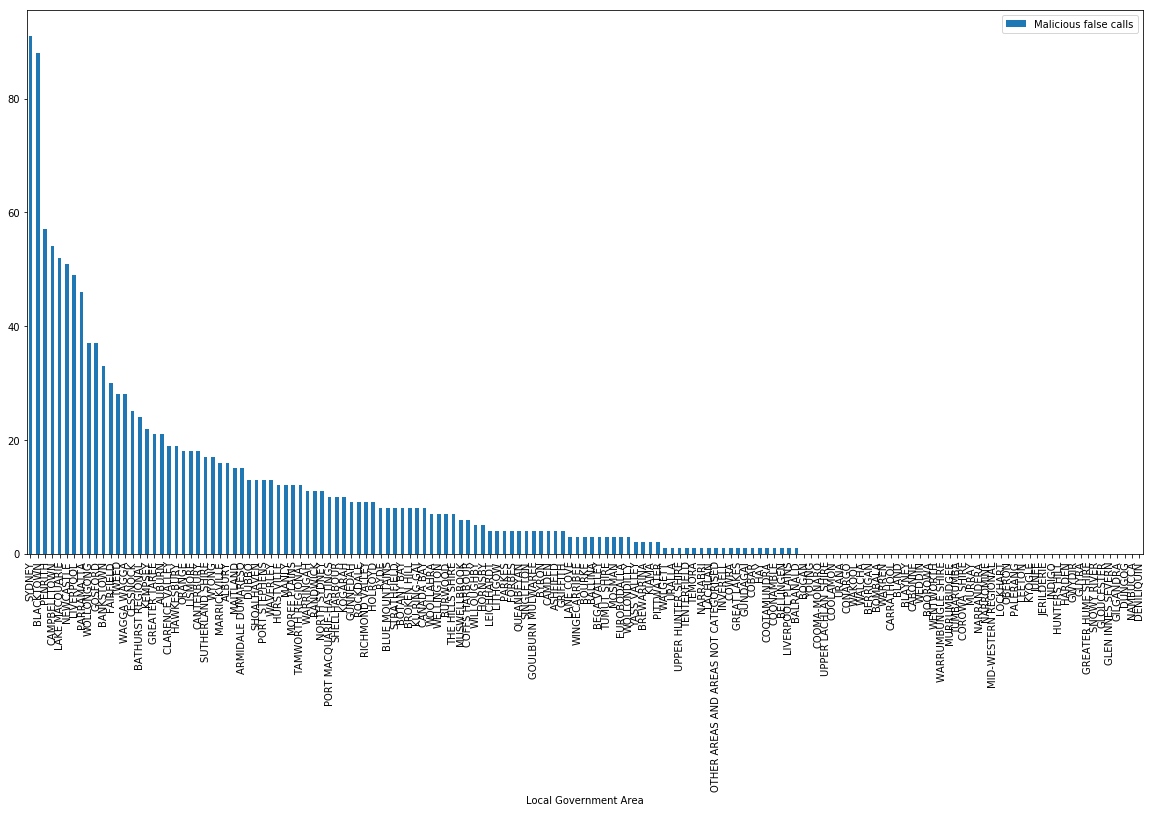

In [30]:
malicious = incident_data.iloc[:, [0, 8]]
malicious_sorted = malicious.sort_values(by=['Malicious false calls'], ascending=0)
malicious_sorted.plot(x = 'Local Government Area', y = 'Malicious false calls', kind = 'bar')
malicious_sorted.head(10)

In [31]:
burbs = gp.GeoDataFrame.from_file(shp_file_name)
burbs.drop(["NSW_LOCA_1", "NSW_LOCA_3", "NSW_LOCA_4", "DT_RETIRE"], axis=1, inplace=True)
burbs

,DT_CREATE,LC_PLY_PID,LOC_PID,NSW_LOCALI,NSW_LOCA_2,NSW_LOCA_5,NSW_LOCA_6,NSW_LOCA_7,geometry
0,2015-09-03,25113,NSW1147,2015-11-10,CROYDON PARK,G,None,1,"POLYGON ((151.1170000066 -33.89151546943, 151...."
1,2015-09-03,25065,NSW2557,2015-11-10,MAYFIELD WEST,G,None,1,"POLYGON ((151.73344571654 -32.87974104891, 151..."
2,2015-09-03,25115,NSW797,2015-11-10,CAMPSIE,G,None,1,"POLYGON ((151.1072750656 -33.9017926364, 151.1..."
3,2011-11-22,16193,NSW4136,2012-02-04,WALLACETOWN,G,None,1,"POLYGON ((147.450924738497 -34.9651865379095, ..."
4,2015-09-03,24884,NSW812,2015-11-10,CANTERBURY,G,None,1,"POLYGON ((151.11758210952 -33.90297173141, 151..."
5,2015-09-03,24885,NSW1359,2015-11-10,EARLWOOD,G,None,1,"POLYGON ((151.14016397916 -33.91626727655, 151..."
6,2015-09-03,25102,NSW3578,2015-11-10,SILVERWATER,G,None,1,"POLYGON ((151.05436177755 -33.82846392023, 151..."
7,2015-09-03,24903,NSW1012,2015-11-10,CONCORD,G,None,1,"POLYGON ((151.10074278046 -33.84456767407, 151..."
8,2012-11-21,19660,NSW4098,2013-01-23,UTUNGUN,G,None,1,"POLYGON ((152.805912214383 -30.710969747357, 1..."
9,2015-09-03,24888,NSW161,2015-11-10,BALMAIN,G,None,1,"POLYGON ((151.17562156594 -33.85249200252, 151..."


In [32]:
def add_centroid(row):
    return row.geometry.centroid

burbs["centroid"] = burbs.apply(add_centroid, axis=1)

In [33]:
list_areas = list(incident_data['Local Government Area'])
list_areas

[u'ALBURY',
 u'ARMIDALE DUMARESQ',
 u'ASHFIELD',
 u'AUBURN',
 u'BALLINA',
 u'BALRANALD',
 u'BANKSTOWN',
 u'BATHURST REGIONAL',
 u'BEGA VALLEY',
 u'BELLINGEN',
 u'BERRIGAN',
 u'BLACKTOWN',
 u'BLAND',
 u'BLAYNEY',
 u'BLUE MOUNTAINS',
 u'BOGAN',
 u'BOMBALA',
 u'BOOROWA',
 u'BOTANY BAY',
 u'BOURKE',
 u'BREWARRINA',
 u'BROKEN HILL',
 u'BURWOOD',
 u'BYRON',
 u'CABONNE',
 u'CAMDEN',
 u'CAMPBELLTOWN',
 u'CANADA BAY',
 u'CANTERBURY',
 u'CARRATHOOL',
 u'CESSNOCK',
 u'CLARENCE VALLEY',
 u'COBAR',
 u'COFFS HARBOUR',
 u'CONARGO',
 u'COOLAMON',
 u'COOMA-MONARO',
 u'COONAMBLE',
 u'COOTAMUNDRA',
 u'COROWA SHIRE',
 u'COWRA',
 u'DENILIQUIN',
 u'DUBBO',
 u'DUNGOG',
 u'EUROBODALLA',
 u'FAIRFIELD',
 u'FORBES',
 u'GILGANDRA',
 u'GLEN INNES SEVERN',
 u'GLOUCESTER',
 u'GOSFORD',
 u'GOULBURN MULWAREE',
 u'GREATER HUME SHIRE',
 u'GREATER TAREE',
 u'GREAT LAKES',
 u'GRIFFITH',
 u'GUNDAGAI',
 u'GUNNEDAH',
 u'GUYRA',
 u'GWYDIR',
 u'HARDEN',
 u'HAWKESBURY',
 u'HAY',
 u'HOLROYD',
 u'HORNSBY',
 u'HUNTERS HILL',
 u'HU

In [34]:
wanted_burbs = burbs[burbs['NSW_LOCA_2'].isin(list_areas)]
wanted_burbs = wanted_burbs.sort_values('NSW_LOCA_2')
wanted_burbs

,DT_CREATE,LC_PLY_PID,LOC_PID,NSW_LOCALI,NSW_LOCA_2,NSW_LOCA_5,NSW_LOCA_6,NSW_LOCA_7,geometry,centroid
3241,2012-05-15,17696,NSW27,2012-07-27,ALBURY,G,None,1,"POLYGON ((146.923046357974 -36.0624156623962, ...",POINT (146.9135418824117 -36.0737295413958)
1815,2016-12-12,26977,NSW98,2017-02-02,ASHFIELD,G,None,1,"POLYGON ((151.12767246715 -33.87429637241, 151...",POINT (151.1261727447849 -33.88872679229004)
430,2015-09-03,25120,NSW106,2015-11-10,AUBURN,G,None,1,"POLYGON ((151.02634451809 -33.83503085115, 151...",POINT (151.0262081311464 -33.85467781341028)
3142,2012-08-15,17792,NSW159,2012-10-30,BALLINA,G,None,1,"POLYGON ((153.571062155949 -28.8024002615618, ...",POINT (153.5600589675006 -28.84170955533136)
456,2015-09-03,25055,NSW165,2015-11-10,BALRANALD,G,None,1,"POLYGON ((143.36794190574 -33.87571532559, 143...",POINT (143.4170122823064 -34.33341952167735)
1810,2016-12-12,26962,NSW179,2017-02-02,BANKSTOWN,G,None,1,"POLYGON ((151.03768648036 -33.90386304681, 151...",POINT (151.0318235911702 -33.92050363983063)
957,2014-08-27,22962,NSW271,2014-11-07,BELLINGEN,G,None,1,"POLYGON ((152.857642122645 -30.4096319504638, ...",POINT (152.8942305740775 -30.44910533269508)
230,2013-08-26,21351,NSW319,2013-11-01,BERRIGAN,G,None,1,"POLYGON ((145.903130214571 -35.4987647277292, ...",POINT (145.827851725164 -35.6456805354677)
4192,2015-05-22,24304,NSW401,2015-08-06,BLACKTOWN,G,None,1,"POLYGON ((150.92640431859 -33.75086622522, 150...",POINT (150.9034841577377 -33.77378952326249)
1379,2015-12-01,25225,NSW409,2016-01-27,BLAND,G,None,1,"POLYGON ((147.56265872071 -33.90940576236, 147...",POINT (147.6346929629724 -34.01129684689695)


In [13]:
# burbs.plot()

# for idx, row in wanted_burbs.iterrows():
#     plt.annotate(s=row.NSW_LOCA_2, 
#                  xy=tuple(row.centroid.coords)[0],
#                  horizontalalignment='center')
# plt.title("Some pretty dodgy suburb names on a map");

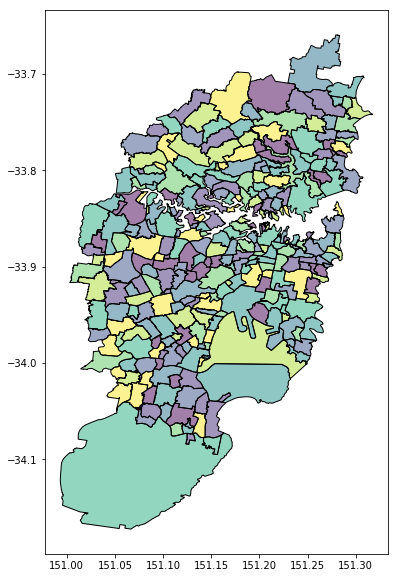

In [14]:
right_here = shapely.geometry.point.Point(151.2299732, -33.9178754)
burbs["distance_from_UNSW"] = burbs.geometry.distance(right_here)

close_burbs = burbs[burbs.distance_from_UNSW<0.2]
close_burbs.plot()

In [1]:
right_here = shapely.geometry.point.Point(151.2299732, -33.9178754)
wanted_burbs["distance_from_UNSW"] = wanted_burbs.geometry.distance(right_here)

close_burbs = wanted_burbs[wanted_burbs.distance_from_UNSW<0.2]
close_burbs.plot(burbs = base)

for idx, row in wanted_burbs.iterrows():
    plt.annotate(s=row.NSW_LOCA_2, 
                 xy=tuple(row.centroid.coords)[0],
                 horizontalalignment='center')
plt.title("Some pretty dodgy suburb names on a map");

NameError: name 'shapely' is not defined

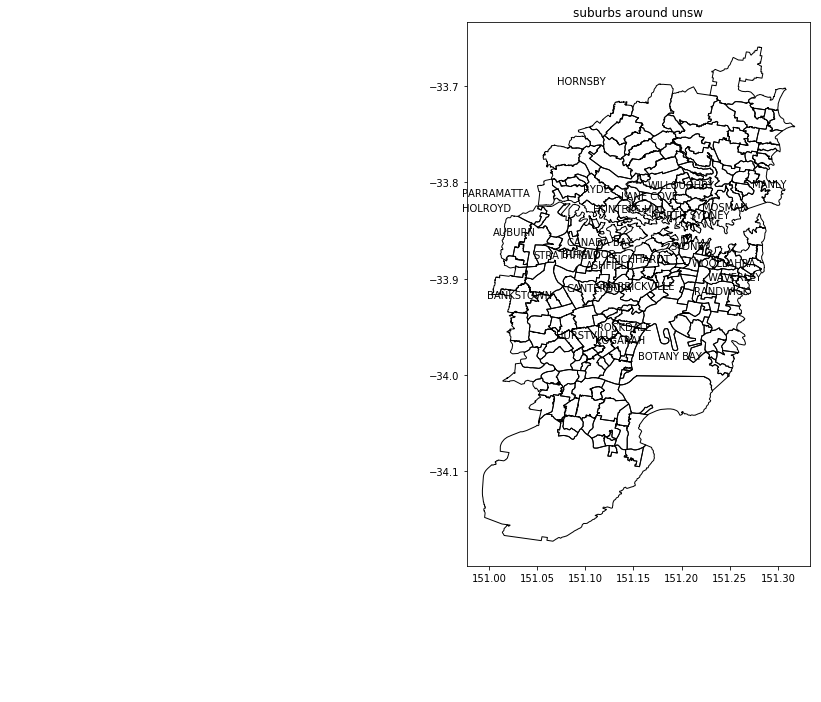

In [16]:
right_here = shapely.geometry.point.Point(151.2299732, -33.9178754)
burbs["distance_from_UNSW"] = burbs.geometry.distance(right_here)

close_burbs = burbs[burbs.distance_from_UNSW<0.2]
close_burbs.plot(color = 'white')

for idx, row in wanted_burbs.iterrows():
    plt.annotate(s=row.NSW_LOCA_2, 
                 xy=tuple(row.centroid.coords)[0],
                 horizontalalignment='center')
plt.title("suburbs around unsw");

In [17]:
test = burbs[burbs['NSW_LOCA_2'].isin(['BURWOOD','BANKSTOWN'])]
test

,DT_CREATE,LC_PLY_PID,LOC_PID,NSW_LOCALI,NSW_LOCA_2,NSW_LOCA_5,NSW_LOCA_6,NSW_LOCA_7,geometry,centroid,distance_from_UNSW
996,2015-02-24,23925,NSW731,2015-05-08,BURWOOD,G,None,1,"POLYGON ((151.101169923065 -33.8684355879607, ...",POINT (151.1038171780702 -33.87805122747323),0.124687
1810,2016-12-12,26962,NSW179,2017-02-02,BANKSTOWN,G,None,1,"POLYGON ((151.03768648036 -33.90386304681, 151...",POINT (151.0318235911702 -33.92050363983063),0.178272


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


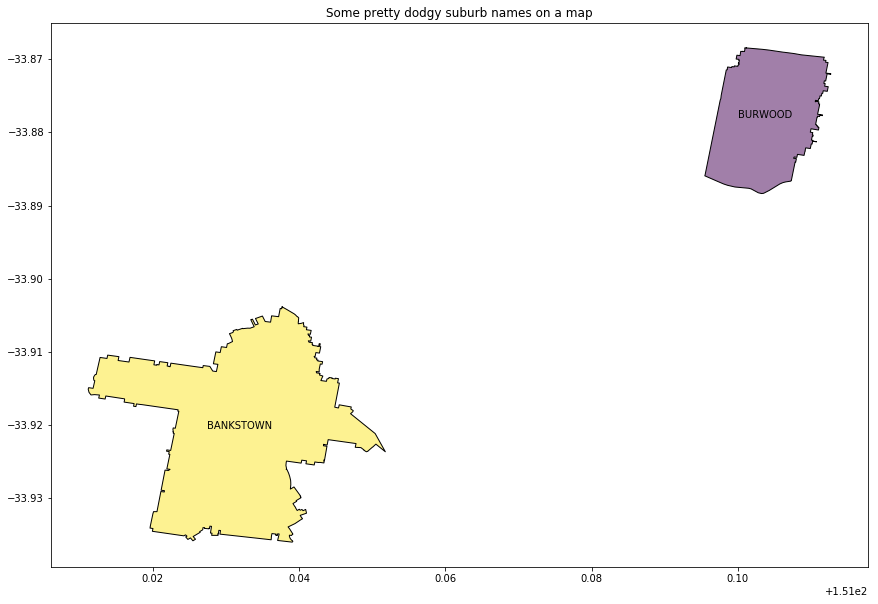

In [18]:
right_here = shapely.geometry.point.Point(151.2299732, -33.9178754)
test["distance_from_UNSW"] = test.geometry.distance(right_here)

test_burbs = test[test.distance_from_UNSW<0.2]
test_burbs.plot()

for idx, row in test.iterrows():
    plt.annotate(s=row.NSW_LOCA_2, 
                 xy=tuple(row.centroid.coords)[0],
                 horizontalalignment='center')
plt.title("Some pretty dodgy suburb names on a map");